In [282]:
import numpy as np
import pandas as pd

#Load Packages
from plotnine import *
from plotnine import geom_col


In [90]:
#Create Data Directory
data_dir = "/Users/kadenbuckley/Desktop/MSBA/Fall_Quarter/GSB_544/Lab1/lab1data/"

# Task 1
**1.) Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.***
    
The variables mapped to each aesthetic include income on the x-axis, life-expectancy on the y-axis, population as size of bubbles, and world region as color.

**2.) Import the q1data.csv dataset**

In [91]:
#Load q1data.csv
data_q1 = pd.read_csv(data_dir + "q1data.csv")
#Remove missing values
data_q1 = data_q1.dropna()
#Show data_q1
data_q1

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**3.) Recreate the plot as best as you can using plotnine.**

In [157]:
#Color Palette for plots
colors = {
    'africa': 'darkturquoise',
    'americas': 'greenyellow',
    'asia' : 'tomato',
    'europe': 'gold'}

#Find Income Levels for labels
data_q1['income_level'] = pd.qcut(data_q1['income'], q=4, labels=['Income Level 1', 'Level 2', 'Level 3', 'Level 4'])

income_level_summary = data_q1.groupby('income_level')['income'].agg(['mean', 'min', 'max'])
print(income_level_summary)
inc_1 = (income_level_summary.at["Income Level 1", "min"] + income_level_summary.at["Income Level 1", "max"]) / 2
inc_2 = (income_level_summary.at["Level 2", "min"] + income_level_summary.at["Level 2", "max"]) / 2
inc_3 = (income_level_summary.at["Level 3", "min"] + income_level_summary.at["Level 3", "max"]) / 2
inc_4 = (income_level_summary.at["Level 4", "min"] + income_level_summary.at["Level 4", "max"]) / 2

#Sort data_q1 with highest population values first in order to make the larger size points fall behind the smaller points on the plot.
data_q1 = data_q1.sort_values(by='population', ascending=False)

                        mean      min       max
income_level                                   
Income Level 1   2254.604167    686.0    3650.0
Level 2          7121.458333   3760.0   10700.0
Level 3         16910.638298  10800.0   25000.0
Level 4         46754.166667  25100.0  108000.0


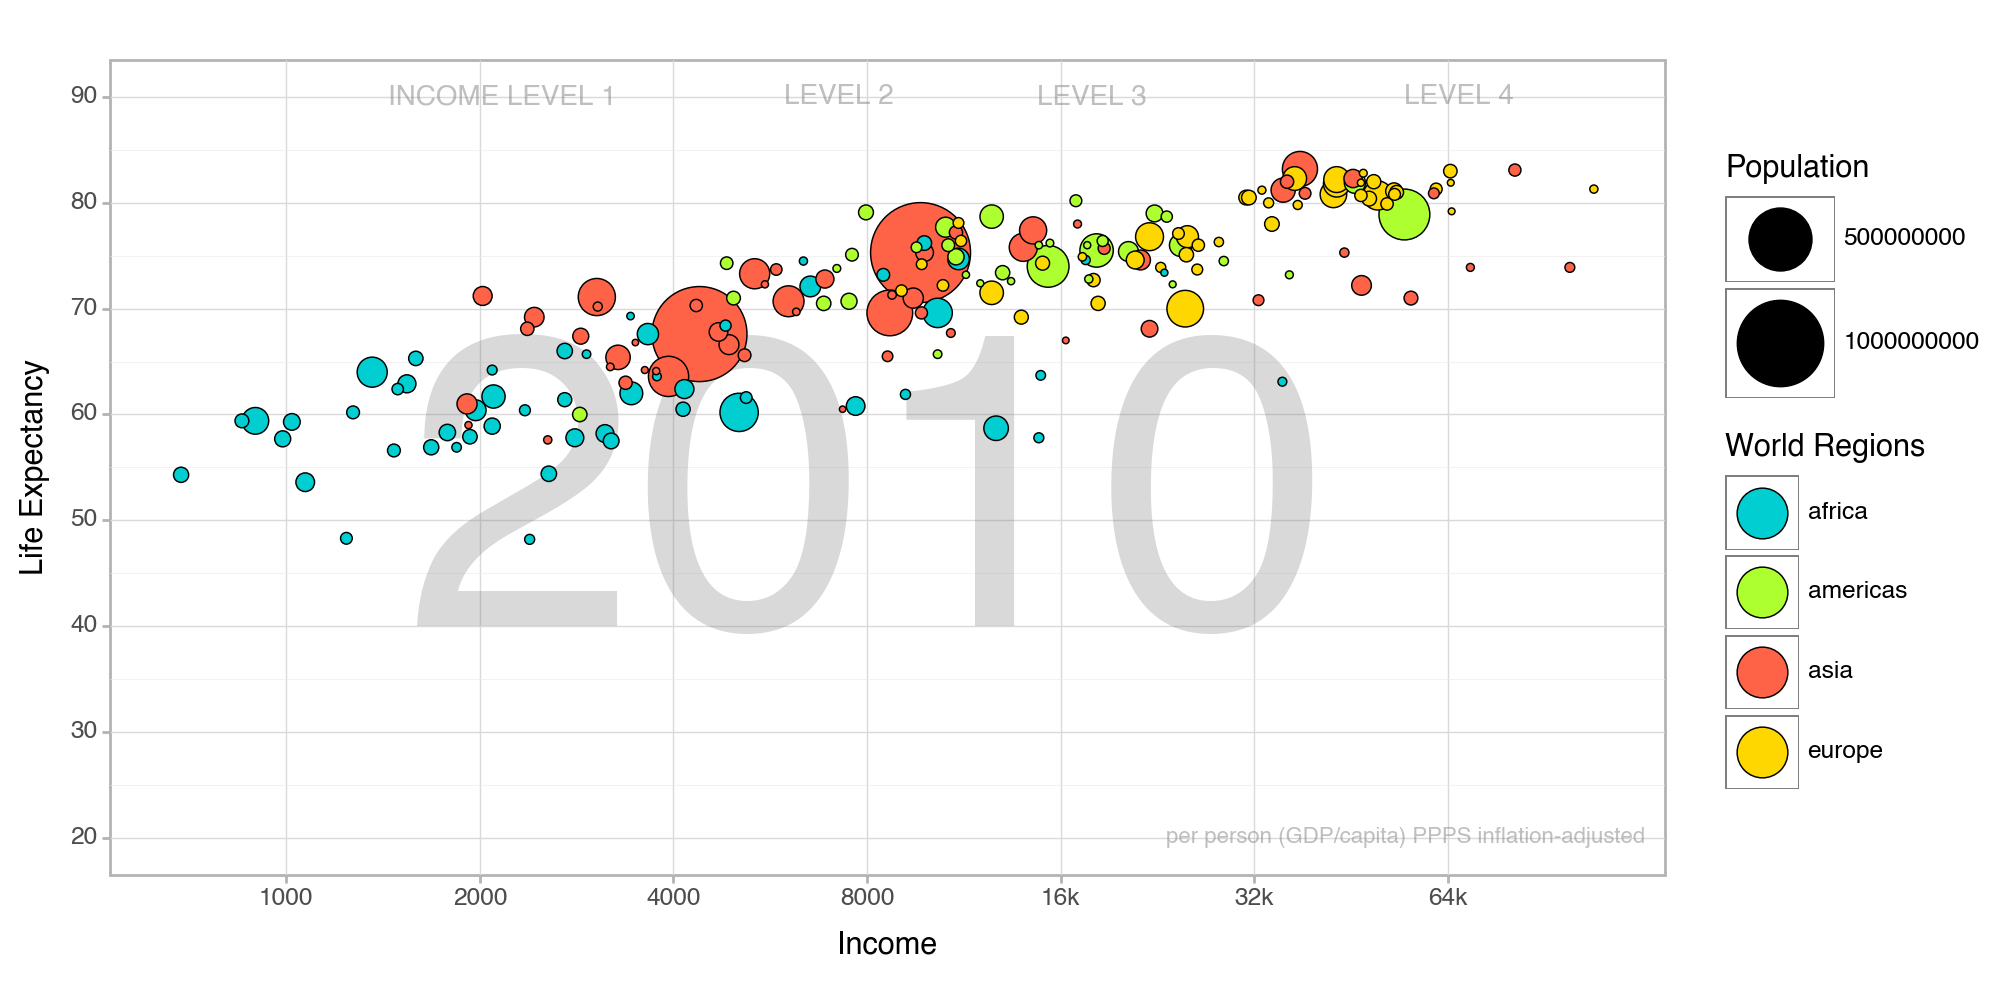

<Figure Size: (1000 x 500)>

In [295]:
#Create Plot for Task 1
p1 = (ggplot(data_q1, aes("income", "life_exp", size = "population", fill = "four_regions", legend = True))
+ annotate("text", x = 8000, y = 50, label = "2010", color = "grey", size = 150, alpha = 0.3)
+ annotate("text", x = inc_1, y = 90, label = "INCOME LEVEL 1", color = "grey", size = 10, alpha = 0.5)
+ annotate("text", x = inc_2 , y = 90, label = "LEVEL 2", color = "grey", size = 10, alpha = 0.5)
+ annotate("text", x = inc_3 , y = 90, label = "LEVEL 3", color = "grey", size = 10, alpha = 0.5)
+ annotate("text", x = inc_4 , y = 90, label = "LEVEL 4", color = "grey", size = 10, alpha = 0.5)
+ annotate("text", x = 55000 , y = 20, label = "per person (GDP/capita) PPPS inflation-adjusted", color = "grey", size = 8, alpha = 0.5)
+ geom_point(stroke = 0.3)
+ labs(x = "Income", y = "Life Expectancy", fill = "World Regions", size = "Population")
+ scale_x_continuous(
    breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
    labels = [500, 1000, 2000, 4000, 8000, '16k', '32k', '64k'],
    trans = "log2")
+ scale_size([1, 20])
+ scale_y_continuous(
    limits = [20,90],
    breaks = [20, 30, 40, 50, 60, 70, 80, 90])
+ theme(panel_background = element_rect(fill="white"))
+ theme_light()
+ scale_fill_manual(values = colors)
+ theme(figure_size = (10, 5))
+ guides(fill=guide_legend(override_aes={"size": 10})) #Make legend for world regions larger.
     )
#View plot for Task 1
p1

**4.) What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

It would be possible to plot this data in a boxplot using geom_boxplot, as seen below. However, this is not as good of a plot as the geom_point plot above since we are no longer able to see individual countries. Despite this, there may be good uses for a boxplot if we are interested at looking at world regions as a whole, rather than countries on an individual level. Here we can see the range of life expectancies in each region, including the quartiles and median. Even though we lose some information by representing the data this way, there are possible cases in which a boxplot could be useful.

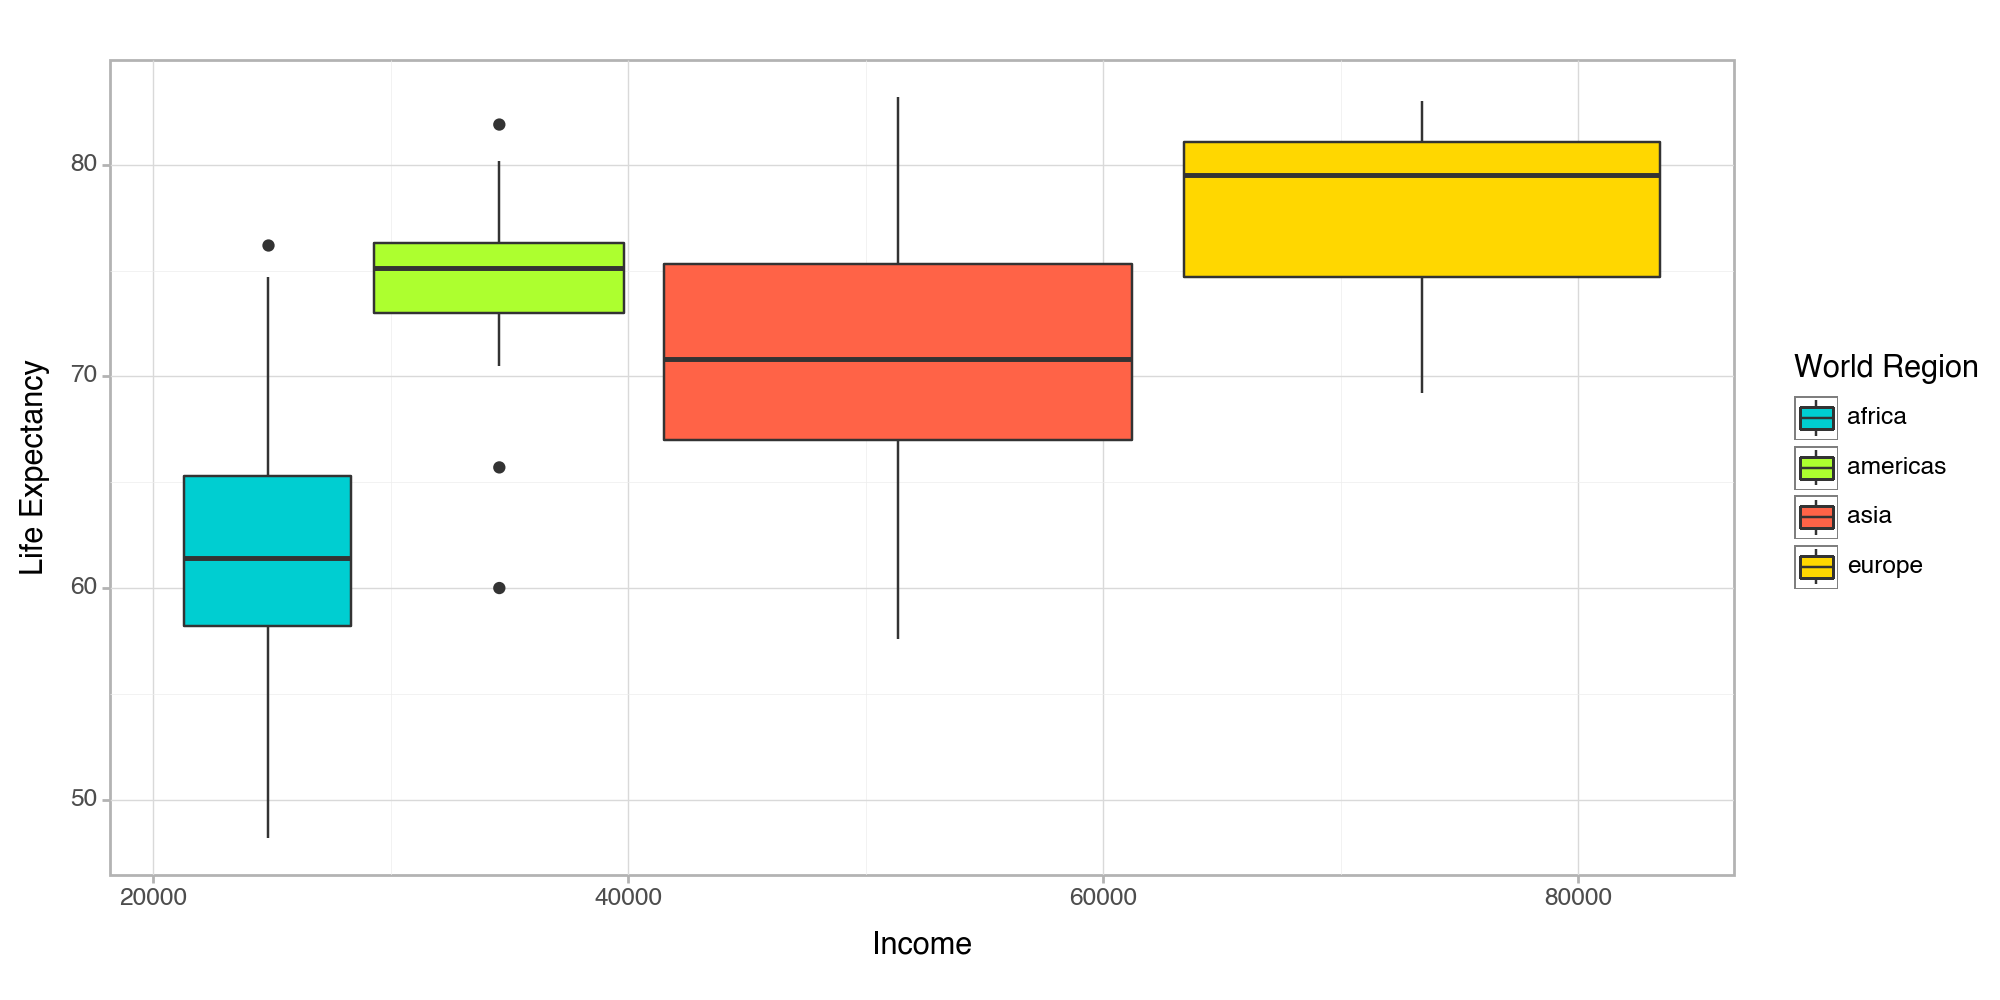

<Figure Size: (1000 x 500)>

In [213]:
p1_2 = (ggplot(data_q1, aes(x = "income", y = "life_exp", fill = "four_regions"))
        + geom_boxplot()
        + labs(x = "Income", y = "Life Expectancy", fill = "World Region")
        + scale_fill_manual(values = colors)
        + theme(panel_background = element_rect(fill="white"))
        + theme_light()
        + theme(figure_size = (10, 5))
       )
p1_2

# Task 2
**1.) Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

The variables mapped to each aesthetic include exports as a percentage of GDP on the x-axis, imports as a percentage of GDP on the y-axis, energy use as size of bubbles, and world region as color.

**2.) Import the q2data.csv dataset**

In [114]:
#Load q2data.csv
data_q2 = pd.read_csv(data_dir + "q2data.csv")
#Remove missing values
data_q2 = data_q2.dropna()
#Show data_q1
data_q2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660.0,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610.0,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550.0,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
198,22.9,22.6,2080.0,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia
200,22.7,20.9,2250.0,1997,Venezuela,americas,america,america_south,Latin America & Caribbean
201,52.2,44.8,340.0,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
204,31.6,24.6,617.0,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**3.) Recreate the plot as best as you can using plotnine.**

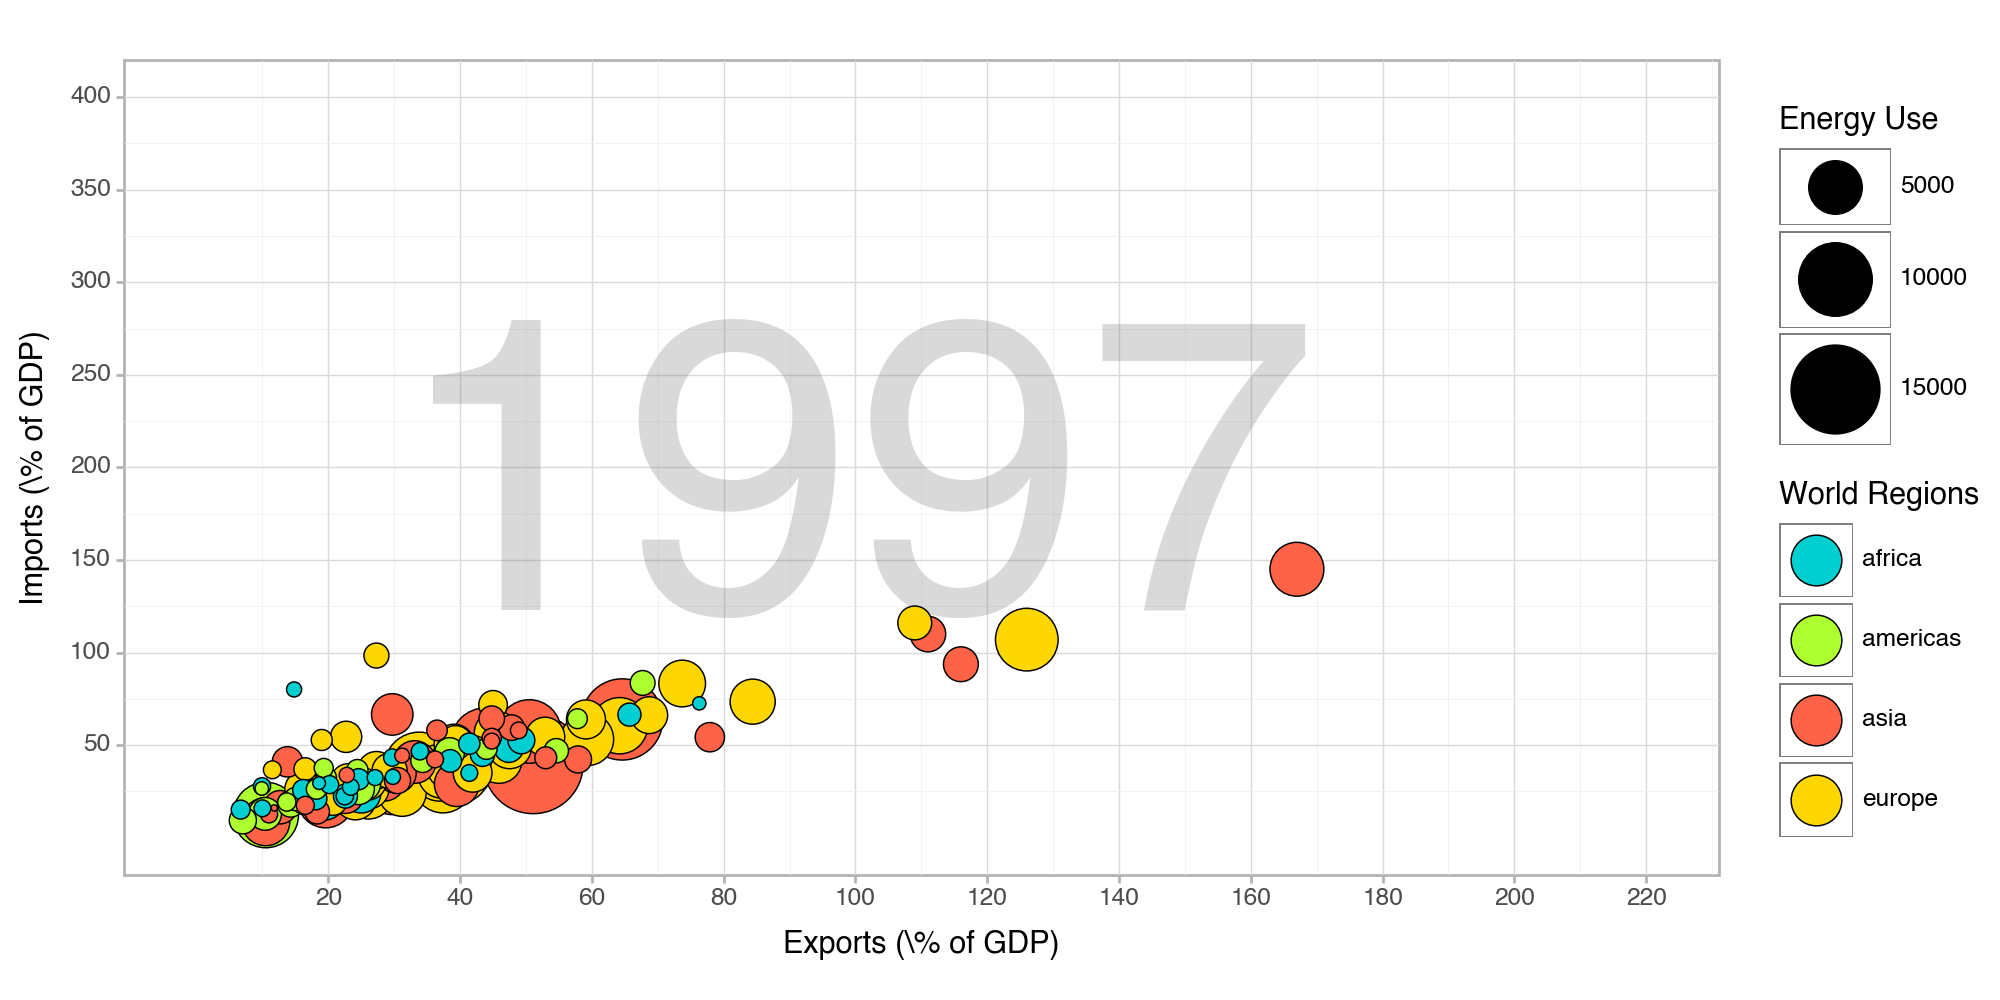

<Figure Size: (1000 x 500)>

In [284]:
#Sort data_q2 with highest energy values first in order to make the larger size points fall behind the smaller points on the plot.
data_q2 = data_q2.sort_values(by='energy', ascending=False)

#Create plot for Task 2
p2 = (ggplot(data_q2, aes("exports", "imports", size = "energy", fill = "four_regions", legend = True))
+ annotate("text", x = 100, y = 180, label = "1997", color = "grey", size = 150, alpha = 0.3)
+ geom_point(stroke = 0.3)
+ labs(x = "Exports (\% of GDP)", y = "Imports (\% of GDP)", fill = "World Regions", size = "Energy Use")
+ scale_x_continuous(
    limits = [0,220],
    breaks = range(20, 240, 20),
    labels = range(20, 240, 20)
)
+ scale_y_continuous(
    limits = [0,400],
    breaks = range(50, 450, 50)
)
+ scale_size([1, 20])
+ theme(panel_background = element_rect(fill="white"))
+ theme_light()
+ scale_fill_manual(values = colors)
+ theme(figure_size = (10, 5))
+ guides(fill=guide_legend(override_aes={"size": 10})) #Make legend for world regions larger.
)
#View plot for Task 2
p2

**4.) What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

Using the data for task 2 it is possible to make density plots. However, in order to see density of imports and exports two density plots must be made. This geometry is bad for visualizing the data relative to the Task 2 geometry, because it is harder to gain value from the visualization. Whereas we can compare imports and exports together in the plot above, this is not possible in density. Additionally, we are no longer able to see the energy use variable.

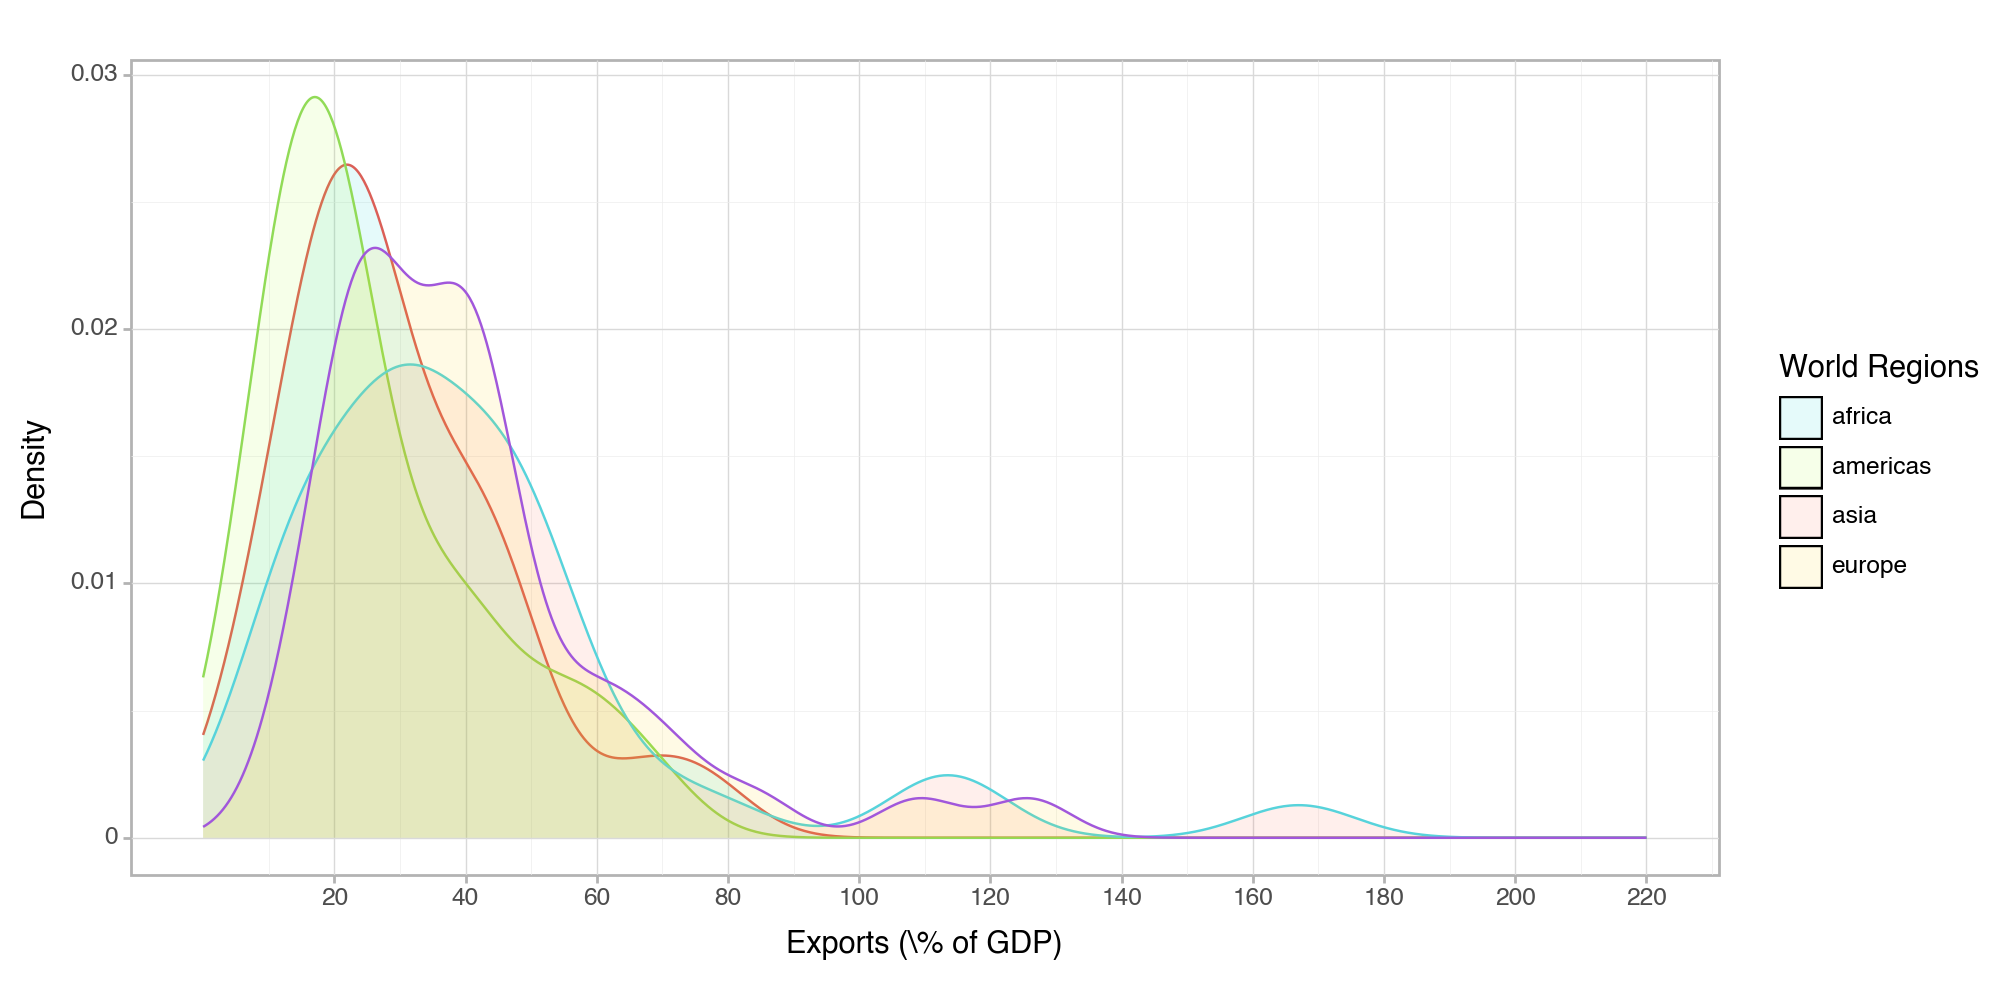

<Figure Size: (1000 x 500)>

In [269]:
p2_2_exp = (ggplot(data_q2, aes(x='exports', color='four_regions', fill='four_regions'))
+ geom_density(alpha=0.1)
+ labs(x = "Exports (\% of GDP)", y = "Density", fill = "World Regions")
+ scale_x_continuous(
    limits = [0,220],
    breaks = range(20, 240, 20),
    labels = range(20, 240, 20))
+theme(panel_background = element_rect(fill="white"))
+ theme_light()
+ scale_fill_manual(values = colors)
+ theme(figure_size = (10, 5))
+ guides(color=False)
       )
p2_2_exp

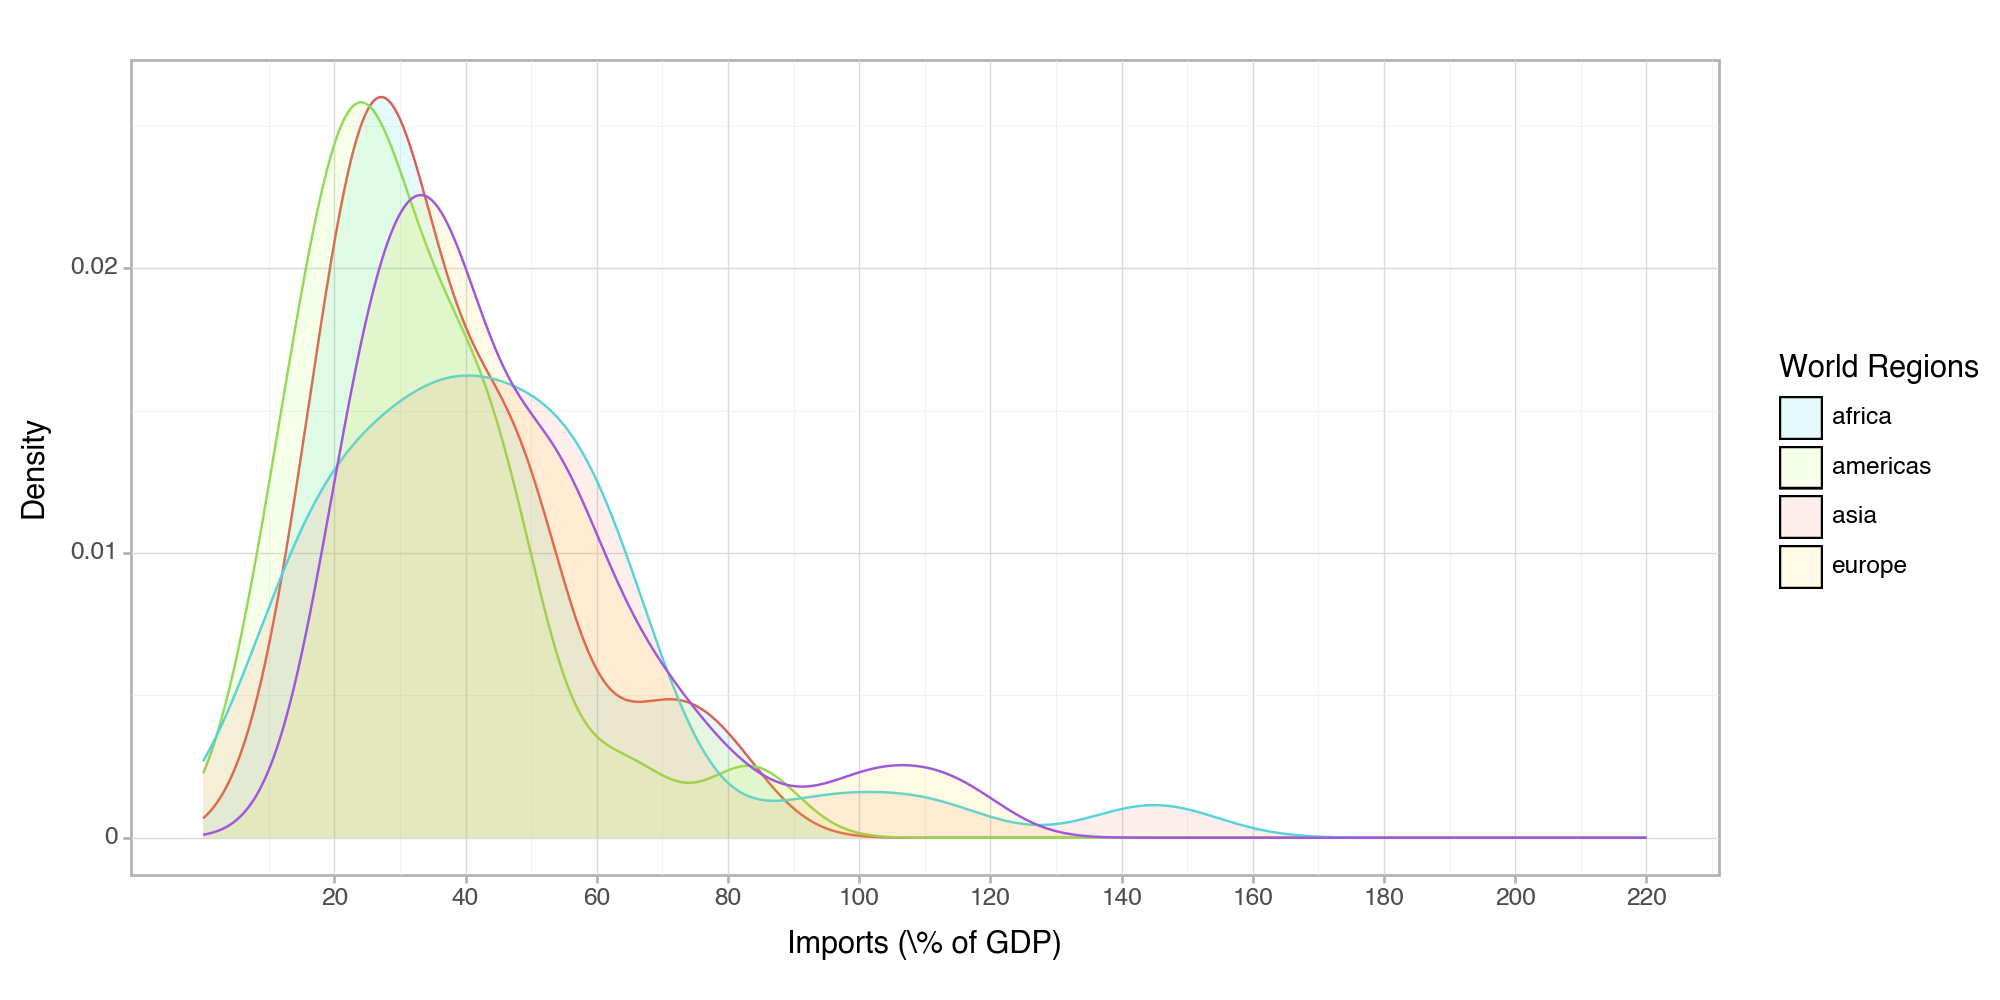

<Figure Size: (1000 x 500)>

In [265]:
p2_2_imp = (ggplot(data_q2, aes(x='imports', color='four_regions', fill='four_regions'))
+ geom_density(alpha=0.1)
+ labs(x = "Imports (\% of GDP)", y = "Density", fill = "World Regions")
+ scale_x_continuous(
    limits = [0,220],
    breaks = range(20, 240, 20),
    labels = range(20, 240, 20))
+ theme(panel_background = element_rect(fill="white"))
+ theme_light()
+ scale_fill_manual(values = colors)
+ theme(figure_size = (10, 5))
+ guides(color=False)
       )
p2_2_imp

# Task 3
**1.) Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

The variables mapped to each aesthetic include internet users on the x-axis, GDP per capita on the y-axis, income as size of bubbles, and world region as color.

**2.) Import the q3data.csv dataset**

In [167]:
#Load q3data.csv
data_q3 = pd.read_csv(data_dir + "q3data.csv")
#Remove missing values
data_q3 = data_q3.dropna()
#Sort data_q3 with highest income values first in order to make the larger size points fall behind the smaller points on the plot.
data_q3 = data_q3.sort_values(by='income', ascending=False)
#Show data_q3
data_q3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
113,39.8000,97300.0,100000.0,2001,Luxembourg,europe,europe_central_asia,europe_west,Europe & Central Asia
158,10.2000,62600.0,89100.0,2001,Qatar,asia,middle_east_north_africa,asia_west,Middle East & North Africa
163,50.8000,64000.0,76000.0,2001,San Marino,europe,europe_central_asia,europe_west,Europe & Central Asia
203,28.3000,59200.0,73000.0,2001,United Arab Emirates,asia,middle_east_north_africa,asia_west,Middle East & North Africa
28,15.3000,36800.0,70800.0,2001,Brunei,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
31,0.1180,232.0,840.0,2001,Burundi,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
63,0.0724,205.0,755.0,2001,Ethiopia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
116,0.2150,361.0,731.0,2001,Malawi,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
131,0.2600,335.0,729.0,2001,Mozambique,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**3.) Recreate the plot as best as you can using plotnine.**

/Users/kadenbuckley/anaconda3/lib/python3.11/site-packages/plotnine/scales/scale.py:783: RuntimeWarning: divide by zero encountered in log10


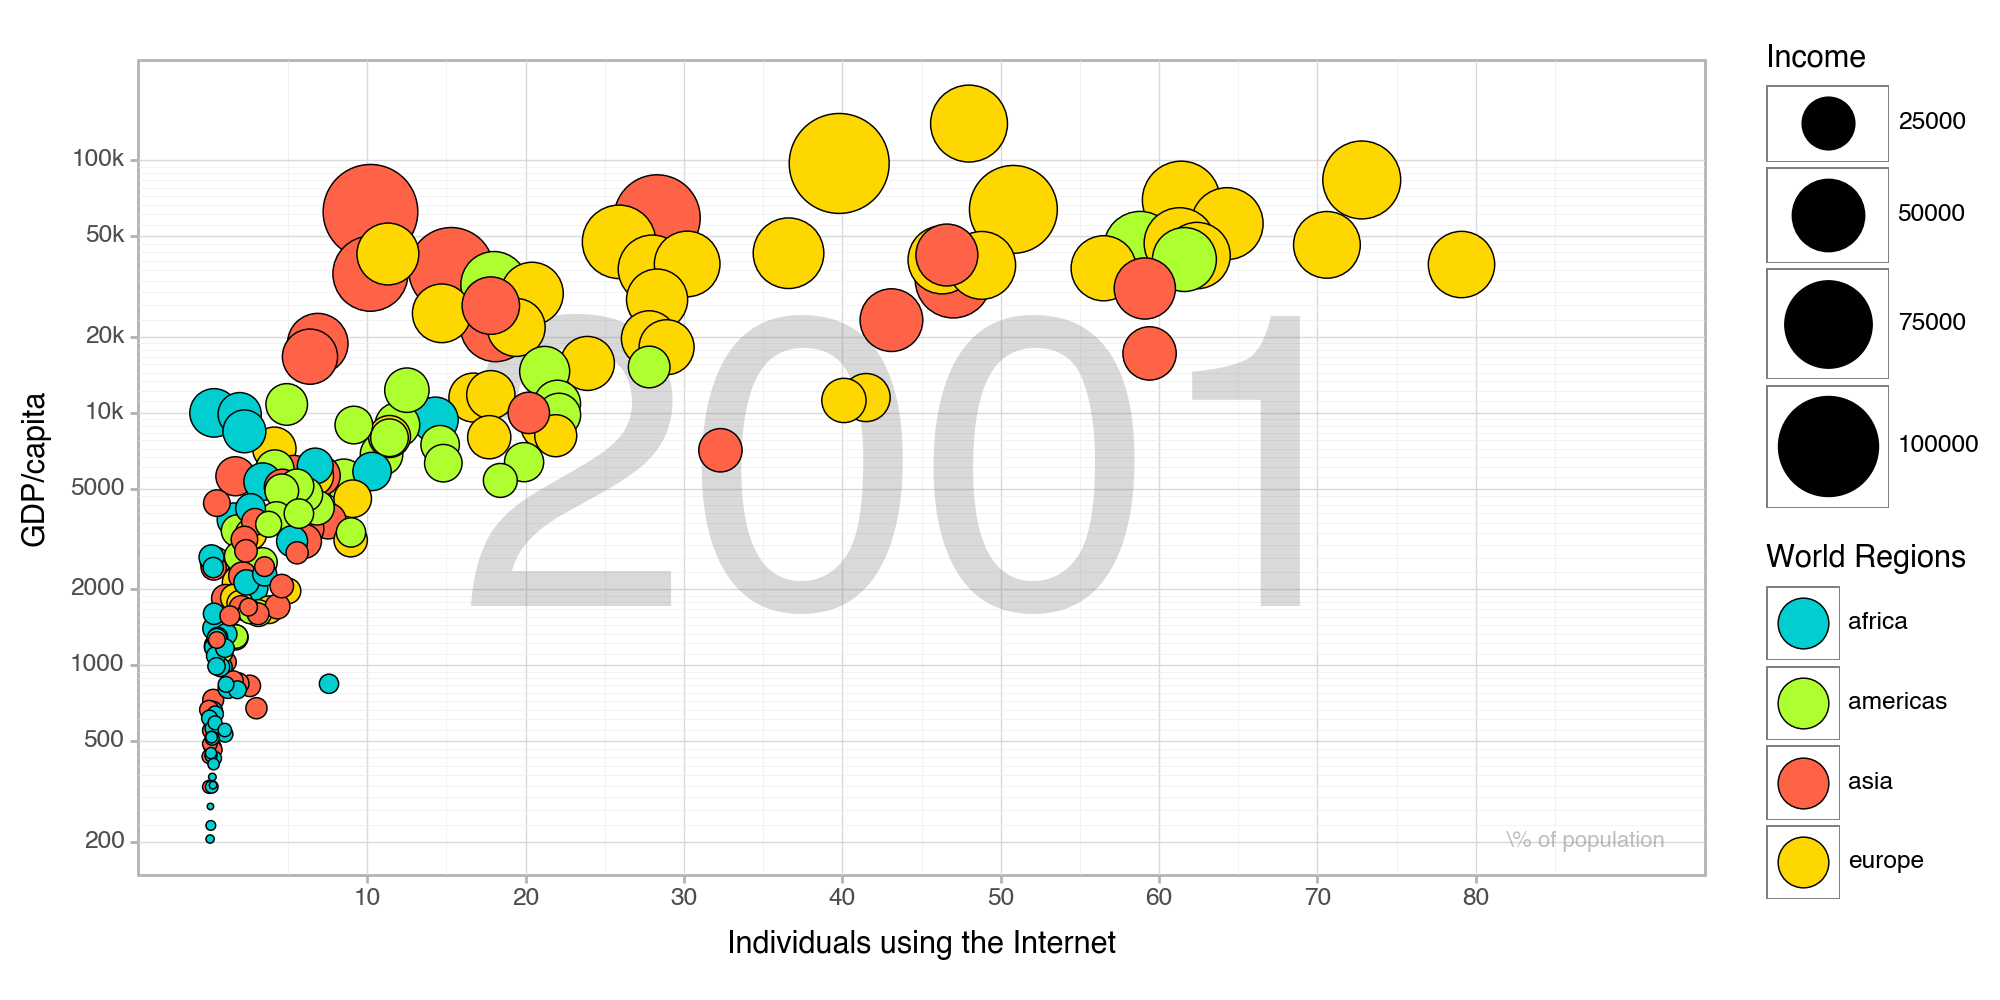

<Figure Size: (1000 x 500)>

In [293]:
#Create plot for Task 3
p3 = (ggplot(data_q3, aes("internet_users", "gdp", size = "income", fill = "four_regions", legend = True))
+ annotate("text", x = 45, y = 4500, label = "2001", color = "grey", size = 150, alpha = 0.3)
+ annotate("text", x = 87 , y = 200, label = "\% of population", color = "grey", size = 8, alpha = 0.5)
+ geom_point(stroke = 0.3)
+ labs(x = "Individuals using the Internet", y = "GDP/capita", fill = "World Regions", size = "Income")
+ scale_x_continuous(
    limits = [0,90],
    breaks = range(10, 90, 10),
    labels = range(10, 90, 10)
)
+ scale_y_continuous(
    limits = [0,250000],
    breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
    labels = [200, 500, 1000, 2000, 5000, '10k', '20k', '50k', '100k'],
    trans = "log10"
              )
+ scale_size([1, 20])
+ theme(panel_background = element_rect(fill="white"))
+ theme_light()
+ scale_fill_manual(values = colors)
+ theme(figure_size = (10, 5))
+ guides(fill = guide_legend(override_aes={"size": 10})) #Make legend for world regions larger.
)
#View plot for Task 2
p3

**4.) What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

It is possible to create a plot with the violin geometry. However, with this geometry we are losing the variable GDP/capita. This plot provides less information than the task 3 geom_point plot above, and therefore it is worse at visualizing the data if we are interested in GDP/capita.

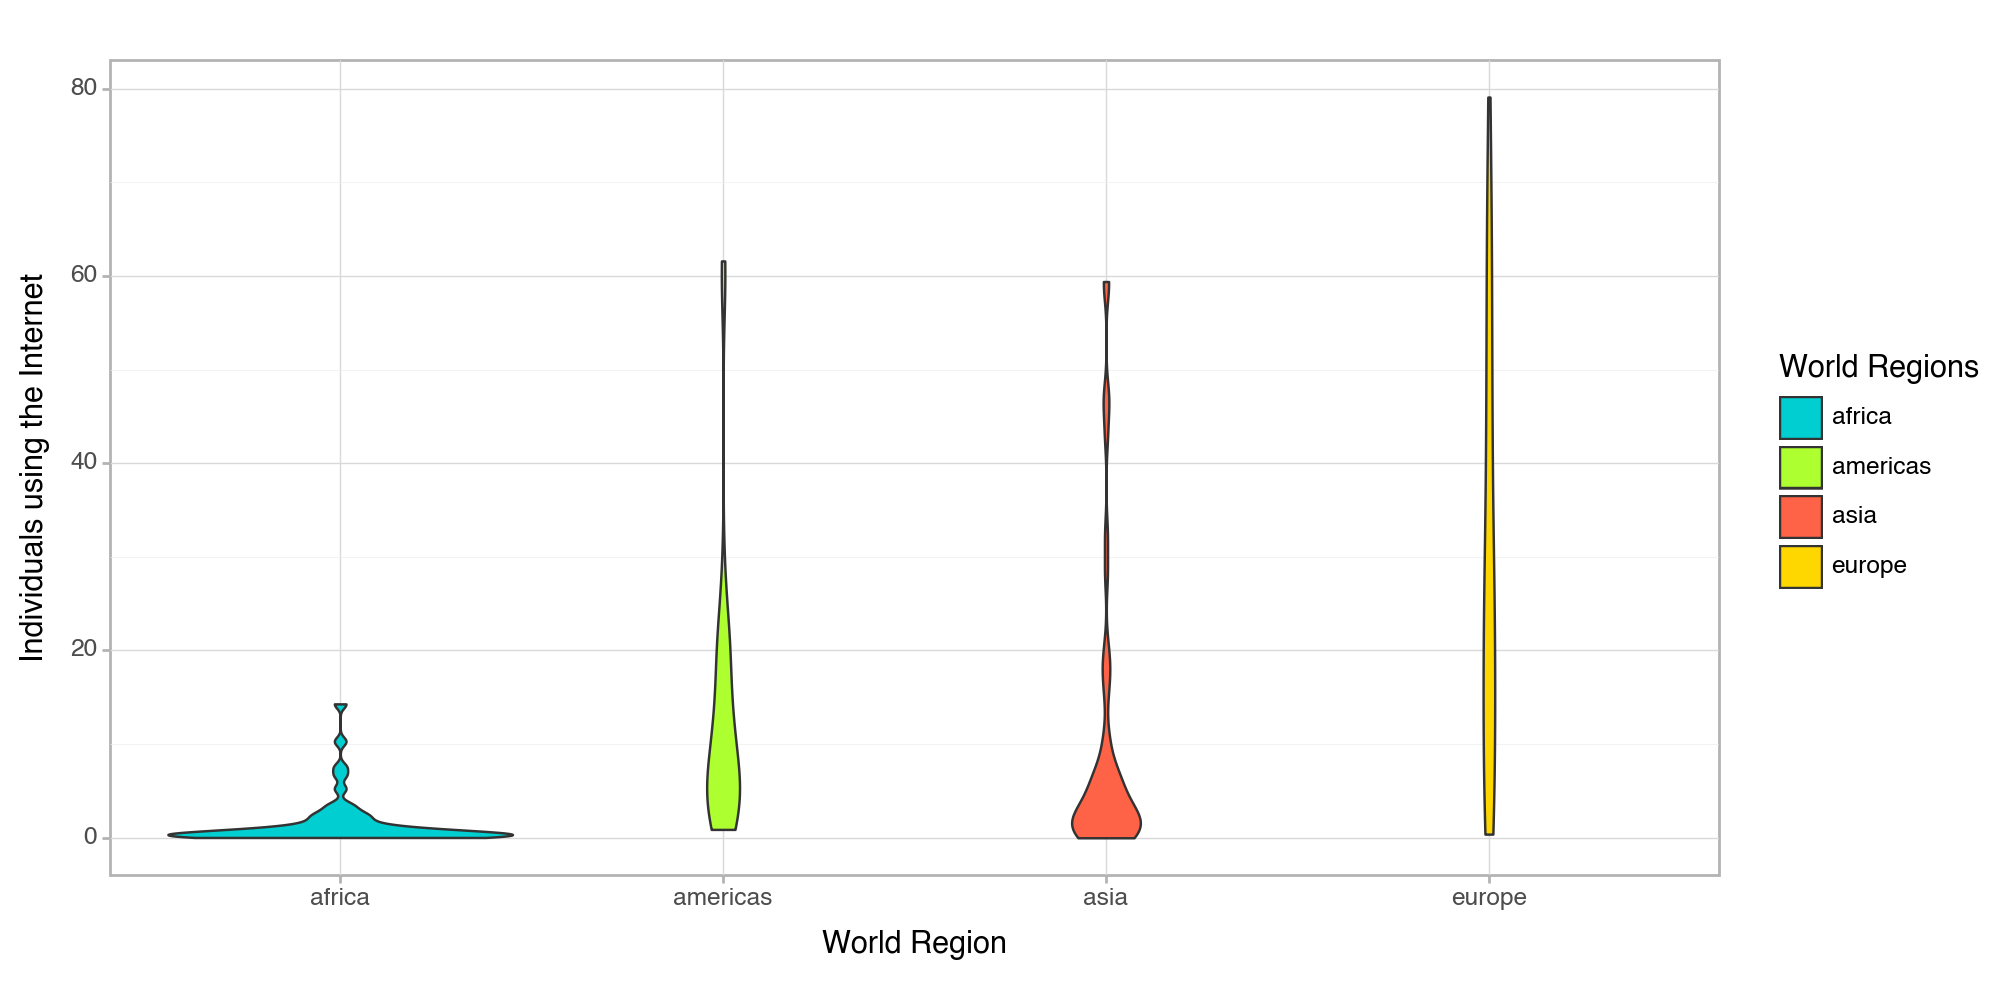

<Figure Size: (1000 x 500)>

In [291]:
p3_2 = (ggplot(data_q3, aes(x='four_regions', y='internet_users', fill="four_regions"))
+ geom_violin(aes(fill='four_regions'))
+ scale_fill_manual(values = colors)
+ labs(x = "World Region", y = "Individuals using the Internet", fill = "World Regions")
+ theme(panel_background = element_rect(fill="white"))
+ theme_light()
+ theme(figure_size = (10, 5))
)
p3_2
